In [1]:
from ipywidgets import FileUpload
import io
import pandas as pd
from IPython.display import display

# 创建一个上传控件
uploader = FileUpload(
    accept='.csv',  # 或其他文件类型 e.g. '.xlsx','.txt', etc.
    multiple=False  # 是否允许多文件上传
)

# 显示上传控件
display(uploader)

FileUpload(value=(), accept='.csv', description='Upload')

In [2]:
import io
import pandas as pd

# 只要访问元组中的第一个元素来处理文件
uploaded_file_info = uploader.value[0]

# 从上传的文件信息中获取内容
content = io.BytesIO(uploaded_file_info['content'])

# 使用 pandas 读取 CSV 内容
df = pd.read_csv(content)

# 数据已读取为DataFrame，显示前几行
display(df.head())

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [3]:
print(len(df))
df.head()

100990


,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [4]:
#Python数据分析工具库
import pandas as pd
#科学计算的工具库
import numpy as np
#基础绘图库
import matplotlib.pyplot as plt
#高级绘图库
import seaborn as sns
#机器学习库，将数据集分割为训练和测试集
from sklearn.model_selection import train_test_split
#数据预处理（归一化）
from sklearn.preprocessing import MinMaxScaler
#搭建和训练深度学习模型
import tensorflow as tf

In [5]:
# 删除列上的空格（左右）
df.columns = df.columns.str.lstrip()
df.columns = df.columns.str.rstrip()
# 打印出样本数据集
print(len(df))
df.head()

100990


,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


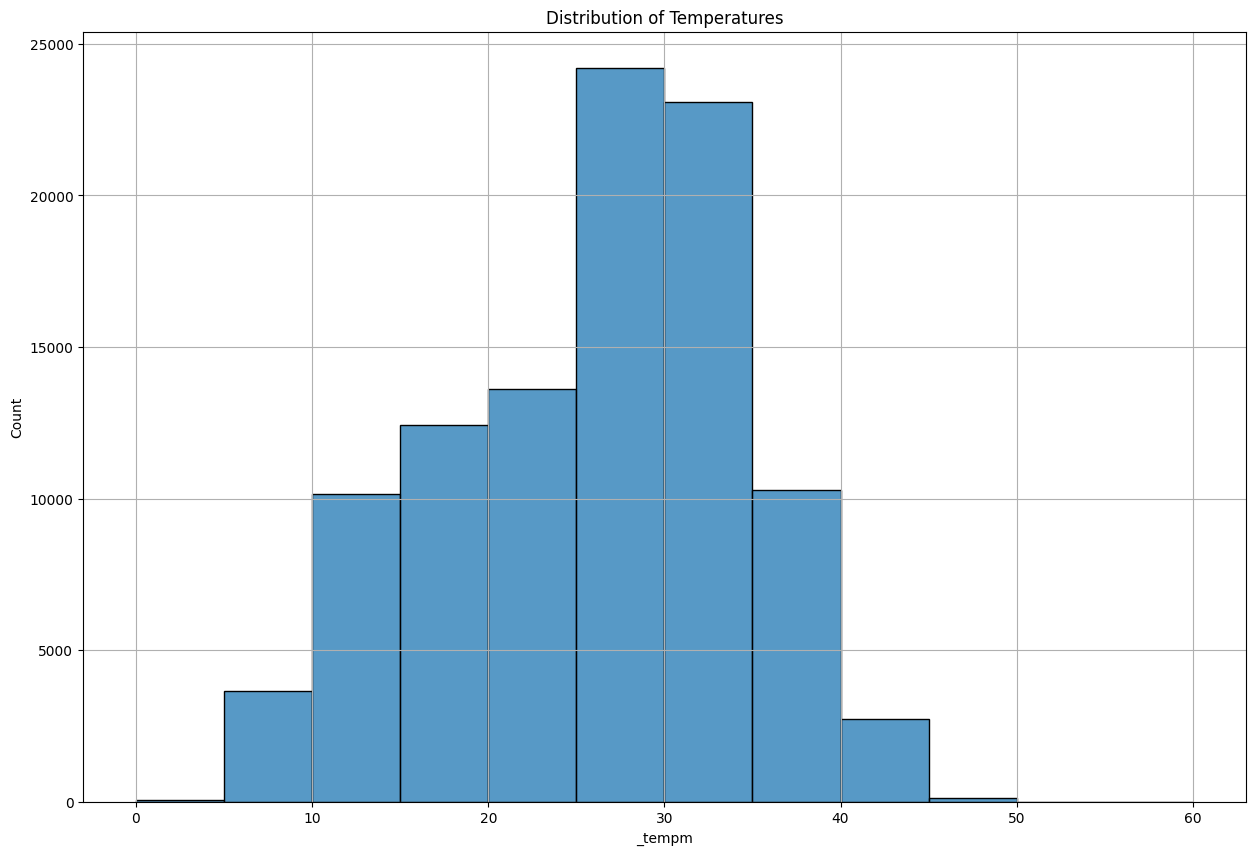

In [6]:
# 绘制温度变化曲线
plt.figure(figsize=(15, 10))
sns.histplot(df['_tempm'],bins=[i for i in range(0,61,5)], kde=False)
plt.title("Distribution of Temperatures")
plt.grid()
plt.show()

In [7]:
# 设置数据索引为datetime列
df.index = pd.to_datetime(df.datetime_utc)
# 仅通过required_columns筛选列
required_cols = ['_dewptm', '_fog', '_hail', '_hum', '_rain', '_snow', '_tempm', '_thunder', '_tornado']
df = df[required_cols]
df.head()

,_dewptm,_fog,_hail,_hum,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,,
1996-11-01 11:00:00,9.0,0,0,27.0,0,0,30.0,0,0
1996-11-01 12:00:00,10.0,0,0,32.0,0,0,28.0,0,0
1996-11-01 13:00:00,11.0,0,0,44.0,0,0,24.0,0,0
1996-11-01 14:00:00,10.0,0,0,41.0,0,0,24.0,0,0
1996-11-01 16:00:00,11.0,0,0,47.0,0,0,23.0,0,0


In [8]:
# 查看数据索引中缺失的值
df.isna().sum()

_dewptm     621
_fog          0
_hail         0
_hum        757
_rain         0
_snow         0
_tempm      673
_thunder      0
_tornado      0
dtype: int64

In [9]:
# 用上面的行值填充缺失值
df = df.bfill()
df.tail()

,_dewptm,_fog,_hail,_hum,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,,
2017-04-24 06:00:00,17.0,0,0,25.0,0,0,34.0,0,0
2017-04-24 09:00:00,14.0,0,0,16.0,0,0,38.0,0,0
2017-04-24 12:00:00,12.0,0,0,14.0,0,0,36.0,0,0
2017-04-24 15:00:00,15.0,0,0,27.0,0,0,32.0,0,0
2017-04-24 18:00:00,15.0,0,0,30.0,0,0,30.0,0,0


In [10]:
#将数据按"天"重采样，并计算平均值
df_final = df.resample('D').mean()
df_final.head()

,_dewptm,_fog,_hail,_hum,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,,
1996-11-01,11.666667,0.0,0.0,52.916667,0.0,0.0,22.333333,0.0,0.0
1996-11-02,10.458333,0.0,0.0,48.625000,0.0,0.0,22.916667,0.0,0.0
1996-11-03,12.041667,0.0,0.0,55.958333,0.0,0.0,21.791667,0.0,0.0
1996-11-04,10.222222,0.0,0.0,48.055556,0.0,0.0,22.722222,0.0,0.0
1996-11-05,8.200000,0.0,0.0,29.400000,0.0,0.0,27.800000,0.0,0.0


In [11]:
df_final.isna().sum()
df_final = df_final.ffill()
df_final.isna().sum()

_dewptm     0
_fog        0
_hail       0
_hum        0
_rain       0
_snow       0
_tempm      0
_thunder    0
_tornado    0
dtype: int64

In [22]:
from sklearn.preprocessing import MinMaxScaler
# 数据归一化
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_final)
# 定义序列长度和特征
sequence_length = 10  # 每个序列的时间步数
num_features = len(df_final.columns)
# 创建序列和相应的标签
sequences = []
labels = []
for i in range(len(scaled_data) - sequence_length):
    seq = scaled_data[i:i+sequence_length]
    label = scaled_data[i+sequence_length][6]  # 创建用于训练神经网络的序列和标签将'_tempm' 索引列作为标签。
    sequences.append(seq)
    labels.append(label)
# 转换为numpy数组
sequences = np.array(sequences)
labels = np.array(labels)
# 分割训练集和测试集
train_size = int(0.8 * len(sequences))#计算训练集大小，通常是全部数据的80%。
train_x, test_x = sequences[:train_size], sequences[train_size:]#分割输入数据
train_y, test_y = labels[:train_size], labels[train_size:]#分割标签数据
print("Train X shape:", train_x.shape)
print("Train Y shape:", train_y.shape)
print("Test X shape:", test_x.shape)
print("Test Y shape:", test_y.shape)

Train X shape: (5976, 10, 9)
Train Y shape: (5976,)
Test X shape: (1494, 10, 9)
Test Y shape: (1494,)


In [18]:
#导入Keras库中的相关模块：Sequential用于创建序贯模型
from tensorflow.keras.models import Sequential
#LSTM表示长短期记忆层，Dense表示全连接层，Dropout用于防止过拟合
from tensorflow.keras.layers import LSTM, Dense, Dropout
#EarlyStopping和ModelCheckpoint是训练过程中的回调函数
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# 创建LSTM模型
model = Sequential()

# 添加LSTM和Dropout层
model.add(LSTM(units=128, input_shape=(train_x.shape[1], train_x.shape[2]),return_sequences=True))
model.add(Dropout(0.2))#表示每个Dropout层会随机丢弃20%的神经元输出，以减少过拟合风险

model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.2))

# 添加一个全连接层，只包含一个神经元
model.add(Dense(units=1))

# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 128)             │          70,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 10, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 132,513 (517.63 KB)

 Trainable params: 132,513 (517.63 KB)

 Non-trainable params: 0 (0.00 B)

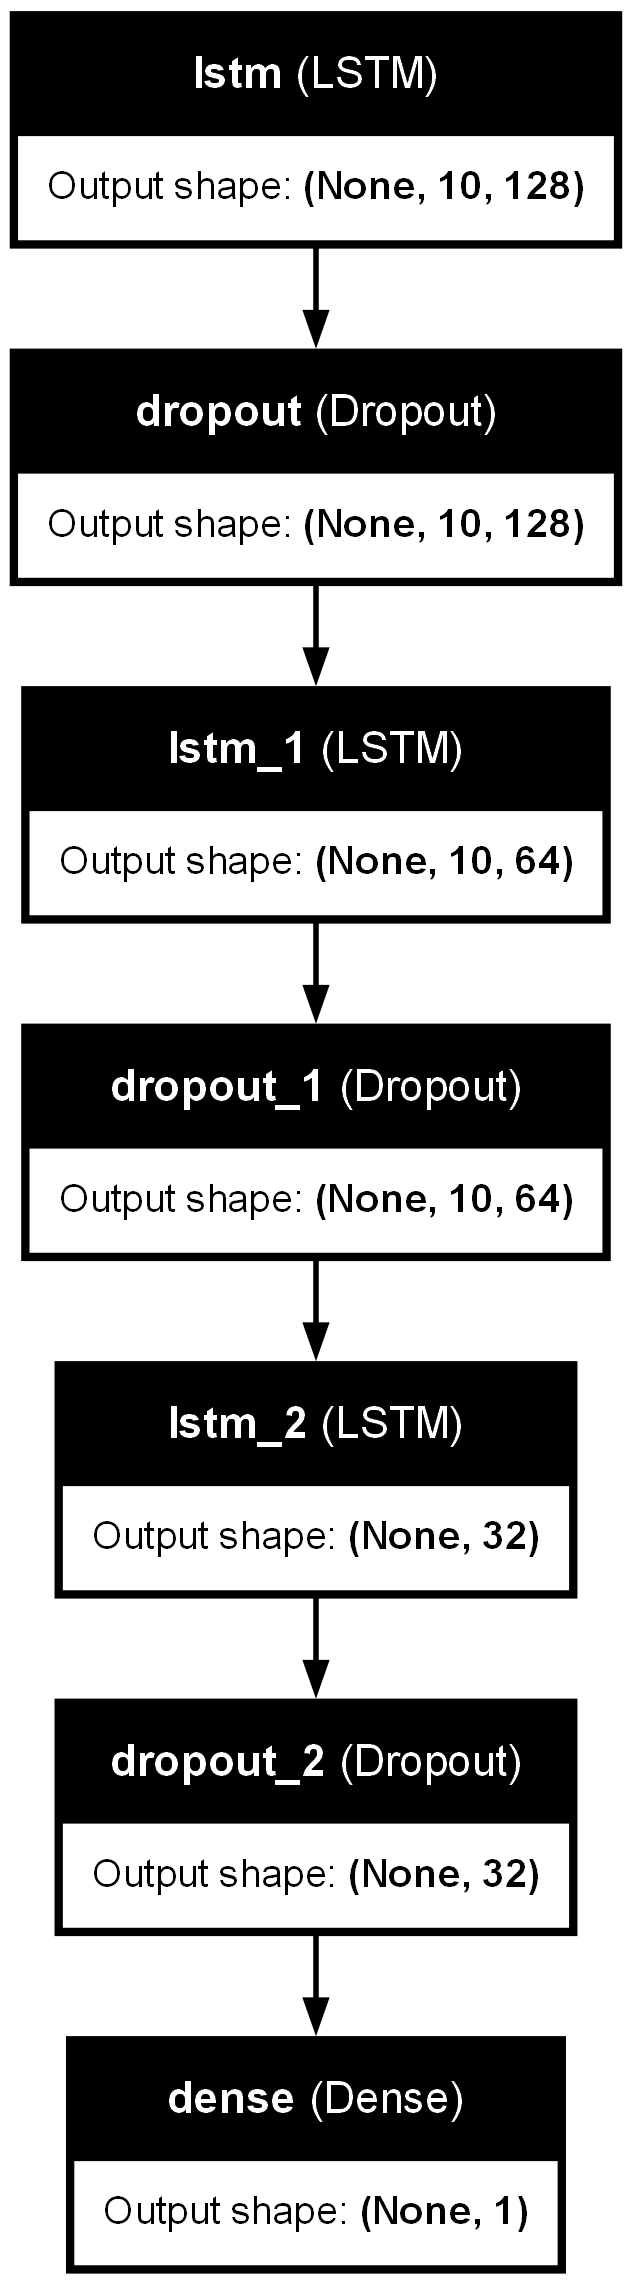

In [15]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)

In [19]:
# 定义回调函数
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('D:\weatherforecast/best_model_weights3.keras', monitor='val_loss', save_best_only=True)
# 训练模型
history = model.fit(
    train_x, train_y,
    epochs=100,
    batch_size=64,
    validation_split=0.2,  # 将20%的训练数据用作验证数据
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0740 - val_loss: 0.0043
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0104 - val_loss: 0.0040
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0097 - val_loss: 0.0039
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0085 - val_loss: 0.0043
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0088 - val_loss: 0.0040
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0079 - val_loss: 0.0034
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0078 - val_loss: 0.0037
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0078 - val_loss: 0.0048
Epoch 9/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0077 - val_loss: 0.0034
Epoch 10/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0074 - val_loss: 0.0032
Epoch 11/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0071 - val_loss: 0.0036
Epoch 12/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 

In [23]:
# 在测试集上评估最佳模型
best_model = tf.keras.models.load_model('D:\weatherforecast/best_model_weights3.keras')
test_loss = best_model.evaluate(test_x, test_y)
print("Test Loss:", test_loss)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021 
Test Loss: 0.001993742072954774


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 已经训练了模型并拥有'best_model'对象
# 所以，'test_x'和'test_y'应该可用

# 使用训练好的模型预测温度
predictions = best_model.predict(test_x)
# 计算评估指标（平均绝对误差/均方误差/均方根误差）
mae = mean_absolute_error(test_y, predictions)
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Mean Absolute Error (MAE): 0.034799455234710994
Mean Squared Error (MSE): 0.001997683456723984
Root Mean Squared Error (RMSE): 0.04469545230472541


In [32]:
# 真实值
test_y_copies = np.repeat(test_y.reshape(-1, 1), test_x.shape[-1], axis=-1)
true_temp = scaler.inverse_transform(test_y_copies)[:,6]

# 预测值
prediction = best_model.predict(test_x)
prediction_copies = np.repeat(prediction, 9, axis=-1)
predicted_temp = scaler.inverse_transform(prediction_copies)[:,6]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


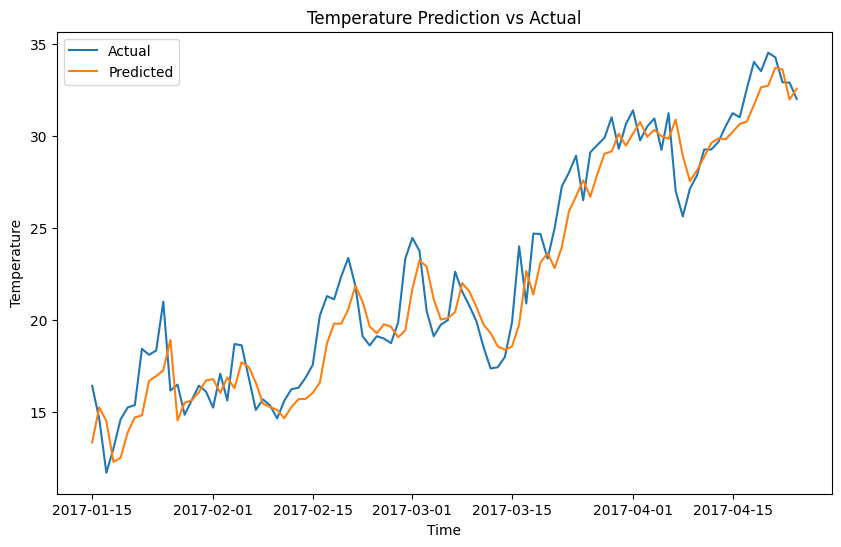

In [33]:
# 绘制预测温度和实际温度
plt.figure(figsize=(10, 6))
plt.plot(df_final.index[-100:], true_temp[-100:], label='Actual')
plt.plot(df_final.index[-100:], predicted_temp[-100:], label='Predicted')
plt.title('Temperature Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()